# Programming Assignment 2: Linear regression

As we know, the COVID-19 pandemic has been disrupting people's life around the world. To get it under control, a crucial aspect is to be able to accurate forecast the spread of the disease, which can be helpful as a planning tool for policymakers, clinicians, and public health officers to deal with this crisis. In this notebook,we will try to do some forecasting on the covid-19 epidemic progression using machine learning. We will use a dataset based on the COVID-19 Data Repository at John Hopkins university.

In [99]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
from math import sqrt 
import sys

In [100]:
print (sys.version)

3.8.1 (tags/v3.8.1:1b293b6, Dec 18 2019, 23:11:46) [MSC v.1916 64 bit (AMD64)]


First, let us load the data.

In [101]:
data_orig = pd.read_csv("us_covid_data.csv")
data = data_orig.copy()
print (data_orig.columns)
data_orig

Index(['date', 'Country', 'hospitalized_with_symptom', 'Intensive_care',
       'Total_hospitalized', 'Home_Isolation', 'Total_positive',
       'Daily_change_in_positive_cases', 'New_positive_cases', 'Recovered',
       'Deaths', 'Total_cases', 'People_tested'],
      dtype='object')


,date,Country,hospitalized_with_symptom,Intensive_care,Total_hospitalized,Home_Isolation,Total_positive,Daily_change_in_positive_cases,New_positive_cases,Recovered,Deaths,Total_cases,People_tested
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2020-09-12T17:00:00,ITA,1951,182,2133,35370,37503,736,1501,213191,35603,286297,9745975
202,2020-09-13T17:00:00,ITA,2042,187,2229,36280,38509,1006,1458,213634,35610,287753,9818118
203,2020-09-14T17:00:00,ITA,2122,197,2319,36868,39187,678,1008,213950,35624,288761,9863427
204,2020-09-15T17:00:00,ITA,2222,201,2423,37289,39712,525,1229,214645,35633,289990,9943944


In [102]:
# change the date format
dates = data['date']
date_format = [pd.to_datetime(d) for d in dates]

# Data Visualization

**Task P1:** complete the following **three** visualization graphs that show the trend of the epidemic progression. Copy them to the solution file.

Graph 1: plot the total number of people tested for the entire period of the dataset. Your X axis will be the dates ("Dates") and Y-axis will be the total number of cases ("People_tested") over the period of time.

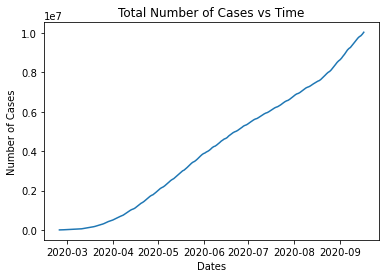

In [103]:
# Add code to plot the trend of the total number of people being tested as days progressed.
# X axis -> dates('Dates')
# Y axis -> number of people tested.('People_tested')

### STUDENT: Start of Code ###
plt.title("Total Number of Cases vs Time")
plt.xlabel("Dates")
plt.ylabel("Number of Cases")
People_tested = data['People_tested']

plt.plot(date_format, People_tested)

plt.show()
### End of code ####

Graph 2: plot the total number of deaths for the entire period. Your X axis will be the dates ("Dates") and Y-axis will be the total number of death cases("Deaths") over the period of time.

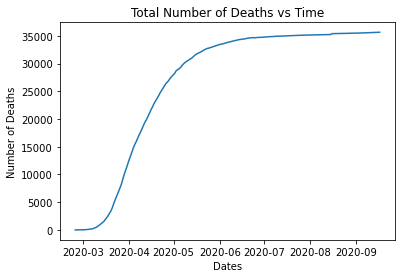

In [104]:
# Add code to plot the trend of total deaths as days progressed.
# X axis -> dates ('Dates')
# Y axis -> number of deaths ('Deaths')


### STUDENT: Start of Code ###
plt.title("Total Number of Deaths vs Time")
plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
Deaths = data['Deaths']

plt.plot(date_format, Deaths)

plt.show()

### End of code ####

Graph 3: plot the total number of infected cases for the entire period. Your X axis will be the dates ("Dates") and Y-axis will be the total number of infected cases ('New_positive_cases') over the period of time.

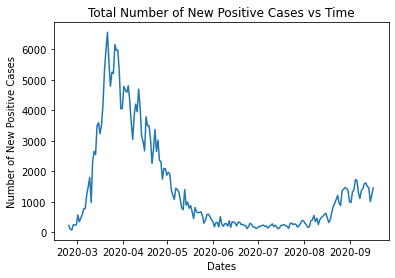

In [105]:
### STUDENT: Start of Code ###
plt.title("Total Number of New Positive Cases vs Time")
plt.xlabel("Dates")
plt.ylabel("Number of New Positive Cases")
New_positive_cases = data['New_positive_cases']

plt.plot(date_format, New_positive_cases)

plt.show()


### End of code ####

As we can see that our data has different ranges of values for every feature and this can cause problems in our model, so here we will normalize our data (ignoring the categorical variables) so that our data is scaled between 0 and 1. The downside, however, is that the numbers are no longer interpretable. To interpret it, you need to multiply back by the scaling factor.

**IMPORTANT: ** From now on, we will work with the normalized features to build the regression model. However, in **Task P8**, you need to convert the number back to the actual units.

In [106]:
data_list = data_orig.columns.values.tolist()

for i in data_list[-11:]:
    data[[i]]=(data_orig[i]-data_orig[i].min())/(data_orig[i].max()-data_orig[i].min())
    
data

,date,Country,hospitalized_with_symptom,Intensive_care,Total_hospitalized,Home_Isolation,Total_positive,Daily_change_in_positive_cases,New_positive_cases,Recovered,Deaths,Total_cases,People_tested
0,2020-02-24T18:00:00,ITA,0.000000,0.000000,0.000000,0.000000,0.000000,0.590051,0.022071,0.000000,0.000000,0.000000,0.000000
1,2020-02-25T18:00:00,ITA,0.000450,0.002227,0.000700,0.000814,0.000833,0.597704,0.002315,0.000000,0.000084,0.000319,0.000428
2,2020-02-26T18:00:00,ITA,0.000934,0.002474,0.001125,0.001520,0.001518,0.596344,0.000000,0.000009,0.000140,0.000587,0.000524
3,2020-02-27T18:00:00,ITA,0.005085,0.007422,0.005384,0.002274,0.003397,0.607313,0.026547,0.000204,0.000281,0.001446,0.000766
4,2020-02-28T18:00:00,ITA,0.008440,0.009401,0.008577,0.003806,0.005554,0.609864,0.024695,0.000209,0.000393,0.002263,0.001133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2020-09-12T17:00:00,ITA,0.063994,0.038595,0.061015,0.422174,0.345089,0.652636,0.219633,0.990365,0.998821,0.982333,0.970262
202,2020-09-13T17:00:00,ITA,0.067142,0.039832,0.063935,0.433064,0.354400,0.675595,0.212996,0.992423,0.999018,0.987332,0.977447
203,2020-09-14T17:00:00,ITA,0.069909,0.042306,0.066673,0.440101,0.360676,0.647704,0.143541,0.993891,0.999411,0.990794,0.981960
204,2020-09-15T17:00:00,ITA,0.073368,0.043295,0.069836,0.445140,0.365536,0.634694,0.177651,0.997120,0.999663,0.995014,0.989980


# Calculate the feature matrix

The following is a function that accepts a list of feature names (e.g. ['Total_Hospitalized', 'People_tested']) and an target feature e.g. ('Deaths') and returns two things:

1. A numpy matrix whose columns are the desired features plus a column with a constant value 1, which is also known as the 'intercept'.
2. A numpy array that contains the values of the target output.


In [107]:
def get_numpy_data(data_frame, features, output):
    # Steps
    # select the columns of data_Frame given by the features list into the variable features_sframe which will include the constant
    # Convert the features_frame into a numpy matrix
    # assign the column of data_frame associated with the output to the array output_array
    # convert the array into a numpy array by first converting it to a list
    # return feature_matrix,output_array
    
    data_frame['constant'] = 1 # here we are adding a constant column 
    # add the column 'constant' to the front of the features list.
    features = ['constant'] + features 
        
    # select the columns of data_Frame given by the features list into the variable features_sframe which will include the constant)
    features_frame = data_frame[features]
    
    # Convert the features_frame into a numpy matrix
    feature_matrix = features_frame.to_numpy()
    # print ("feature_matrix:", feature_matrix)
    
    # assign the column of data_frame associated with the output to the array output_array
    output_array = data_frame[output]
    
    # convert the array into a numpy array by first converting it to a list
    output_array = output_array.to_numpy()
    
    return(feature_matrix, output_array)    

For dates, we need to convert them into a sequence of numbers. We now add a new column to our dataframe corresponding to the number of days since the start of the dataset.

In [108]:
X = date_format
day_numbers = []
for i in range(1, len(X) + 1):
    day_numbers.append([i])
    
data['Days'] = pd.DataFrame(day_numbers,columns = ['Days'])
data["Days"] = data["Days"].astype(int)

Test the above function for a particular input and output feature.

In [109]:
(example_features, example_output) = get_numpy_data(data, ['Days'], 'New_positive_cases')
print (example_features[0,:]) 
print (example_output[0]) 

[1 1]
0.022071307300509338


# Predict the outputs with given regression weights

Suppose we had the weights $[1, 1]$ corresponding to the features $[1, 100]$, to compute the predicted output, we can simply take the dot product between them, so the output is $1*1 + 1*100 = 101$. Now, let's create the data with 

In [110]:
(test_features, output) = get_numpy_data(data, ['Days'], 'People_tested')

**Task P2:** Complete the following function  'predict_output'. Copy the the outputs of the code to the solution file.

In [111]:
def predict_output(feature_matrix, weights):
    # Inputs:
    # feature_matrix: a numpy matrix containing the features as columns (including the intercept), 
    #                 and each row corresponds to a data point
    # weights: a numpy array for the corresponding regression weights (including the intercept)
    # Output:
    # a numpy array that contains the predicted outputs (according to the provided weights) 
    # for all the data points in the feature_matrix
 
    # STUDENT: Start of code ####
    features = np.array(feature_matrix)
    regress_weights = np.array(weights)
    
    return np.dot(features, regress_weights)
    ## end of code

In [112]:
# Copy the outputs of this code to the solution file
my_weights = np.array([1., 1.])
test_predictions = predict_output(example_features, my_weights)
print ("(normalized) prediction at day 5: ", test_predictions[5]) 
print ("(normalized) prediction at day 20 ", test_predictions[20])

(normalized) prediction at day 5:  7.0
(normalized) prediction at day 20  22.0


# Compute the derivative

We will now compute the derivative of the regression cost function: 
$$L_D(w) = \frac{1}{n}\sum_{i=1}^n (y_i-w\cdot x_i)^2,$$
where $x_i\in \mathrm{R}^d$ is the input feature of dimension $d$, $y_i\in\mathrm{R}$ is the output response, and $w\in\mathrm{R}^d$ is the regression weights.

**Task P3:** Complete the function 'weight_derivative' to calculate the derivative of the cost function with respect to regression weights $w$, i.e., $\frac{\partial}{\partial w}L_D(w)$. Note that this should be a $d$ dimensional vector. Also copy the output of the code for the test example to the solution file.

In [113]:
def weight_derivative(weights, feature_matrix, labels):
    # Input:
    # weights: weight vector w, a numpy vector of dimension d
    # feature_matrix: numpy array of size n by d, where n is the number of data points, and d is the feature dimension
    # labels: true labels y, a numpy vector of dimension d
    # Output:
    # Derivative of the regression cost function with respect to the weight w, a numpy array of dimension d

    ## STUDENT: Start of code ###

    error = np.subtract( labels, np.dot(feature_matrix, weights ) )
    derivative = -2/len(labels)*np.dot(np.transpose(feature_matrix), error)

#     print("Size of Weights:", weights.shape )
#     print("Size of features:", feature_matrix.shape )
#     print("Size of Labels:", labels.shape )

    return derivative
    # End of code ###

In [114]:
# NOTE: copy the output to the solution file.

(example_features, example_output) = get_numpy_data(data, ['Days'], 'People_tested') 
my_weights = np.array([0., 0.]) # this makes all the predictions 0
derivative = weight_derivative(my_weights, example_features,example_output)

print (derivative)

[  -0.82103242 -120.60087518]


# Gradient descent algorithm

Here, we will write a function to perform gradient descent algorithm on the lineare regression cost. Given an initial point, we will update the current weights by moving in the negative gradient direction to minimize the cost function. Thus, in each iteration we obtain the updated weight $w_{t+1}$ from the current iterate $w_t$ as follows:
$$w_{t+1} = w_t - h\frac{\partial}{\partial w}L_D(w_t),$$
where $h$ is the 'step_size' that is the amount by which we move in the negative gradient direction. 

We stop when we are sufficiently close to the optimum (where gradient is the zero vector) by checking the condition with respect to the magnitude (length) of the gradient vector:
$$\|\frac{\partial}{\partial w}L_D(w_t)\|_2\leq \epsilon,$$
where $\epsilon$ is the 'tolerance' parameter.

**Task P4:** Complete the code section to perform the gradient decent in the function `regression_gradient_descent`. Copy the code to the solution file.

In [115]:
def regression_gradient_descent(feature_matrix, labels, initial_weights, step_size, tolerance):
    # Gradient descent algorithm for linear regression problem    
    
    # Input:
    # feature_matrix: numpy array of size n by d, where n is the number of data points, and d is the feature dimension
    # labels: true labels y, a numpy vector of dimension d
    # initial_weights: initial weight vector to start with, a numpy vector of dimension d
    # step_size: step size of update
    # tolerance: tolerace epsilon for stopping condition
    # Output:
    # Weights obtained after convergence

    converged = False 
    weights = np.array(initial_weights) # current iterate
    i = 0
    while not converged:
        i += 1
        # STUDENT: Start of code: your impelementation of what the gradient descent algorithm does in every iteration
        # Refer back to the update rule listed above: update the weight
        derivative = weight_derivative(weights, feature_matrix, labels);
        weights = weights - step_size*derivative
        
        # Compute the gradient magnitude:
        
        gradient_magnitude = np.linalg.norm( weight_derivative(weights, feature_matrix, labels) )
        
        # Check the stopping condition to decide whether you want to stop the iterations
        if  gradient_magnitude <= tolerance:   # STUDENT: check the stopping condition here
            converged = True
        
        # End of code
        
        print ("Iteration: ",i,"gradient_magnitude: ", gradient_magnitude) # for us to check about convergence
        
    return(weights)

# Use gradient descent for linear regression

Let's test the gradient descent algorithm for linear regression with a single feature ('Day'). Here we are using first 180 days' data as our training data.

In [116]:
#train_data
train_data = data[:180]

**Task P5:** Specify the initial_weights, step_size, and tolerance for the function `regression_gradient_descent`. Copy the outputs of the code to the solution file.


In [117]:
simple_features = ['Days']
my_output = 'People_tested'

# Use get_numpy_data method to calculate the feature matrix and output. 
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)

#Initialize the weights, step size and tolerance
# Start of code
#STUDENT: Specify the initial_weights, step_size, and tolerance
initial_weights = [1.0, 1.0]
step_size = 7e-8
tolerance = 1.2e4
# end of code

# Use the regression_gradient_descent function to calculate the gradient decent and store it in the variable 'final_weights'
final_weights = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

# end of code
print ("Here are the final weights after convergence:")
print (final_weights)

<ipython-input-107-8b2916f5b454>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['constant'] = 1 # here we are adding a constant column


Iteration:  1 gradient_magnitude:  21840.81707866705
Iteration:  2 gradient_magnitude:  21807.51575965956
Iteration:  3 gradient_magnitude:  21774.265216126485
Iteration:  4 gradient_magnitude:  21741.06537064902
Iteration:  5 gradient_magnitude:  21707.91614592638
Iteration:  6 gradient_magnitude:  21674.81746477566
Iteration:  7 gradient_magnitude:  21641.769250131623
Iteration:  8 gradient_magnitude:  21608.77142504654
Iteration:  9 gradient_magnitude:  21575.82391269002
Iteration:  10 gradient_magnitude:  21542.92663634879
Iteration:  11 gradient_magnitude:  21510.079519426563
Iteration:  12 gradient_magnitude:  21477.282485443844
Iteration:  13 gradient_magnitude:  21444.53545803773
Iteration:  14 gradient_magnitude:  21411.838360961778
Iteration:  15 gradient_magnitude:  21379.191118085775
Iteration:  16 gradient_magnitude:  21346.593653395597
Iteration:  17 gradient_magnitude:  21314.045890993017
Iteration:  18 gradient_magnitude:  21281.547755095533
Iteration:  19 gradient_magn

Iteration:  329 gradient_magnitude:  13240.600685077521
Iteration:  330 gradient_magnitude:  13220.412362213463
Iteration:  331 gradient_magnitude:  13200.254821063256
Iteration:  332 gradient_magnitude:  13180.128014693135
Iteration:  333 gradient_magnitude:  13160.031896240891
Iteration:  334 gradient_magnitude:  13139.966418915794
Iteration:  335 gradient_magnitude:  13119.931535998428
Iteration:  336 gradient_magnitude:  13099.927200840631
Iteration:  337 gradient_magnitude:  13079.953366865357
Iteration:  338 gradient_magnitude:  13060.009987566575
Iteration:  339 gradient_magnitude:  13040.09701650918
Iteration:  340 gradient_magnitude:  13020.21440732885
Iteration:  341 gradient_magnitude:  13000.362113731955
Iteration:  342 gradient_magnitude:  12980.540089495467
Iteration:  343 gradient_magnitude:  12960.748288466819
Iteration:  344 gradient_magnitude:  12940.98666456382
Iteration:  345 gradient_magnitude:  12921.255171774554
Iteration:  346 gradient_magnitude:  12901.55376415

**Task P6:** Use the learned weights to predict 'People_tested' in the last three weeks in the dataset. Copy the predictions to the solution file, and calculate the test error
$$\frac{1}{n_{\mathrm{tst}}}\sum_{i=1}^{n_{\mathrm{tst}}} (y_i^{\mathrm{tst}}-\hat{y}_i^{\mathrm{tst}})^2,$$
where $n_{\mathrm{tst}}$ is the number of test data, $y_i^{\mathrm{tst}}$ is the true label, $\hat{y}_i^{\mathrm{tst}}$ is the predicted label.

In [118]:
# Create the test data
test_data = data.iloc[-21:]
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
test_predictions = predict_output(test_simple_feature_matrix, final_weights)
print (test_predictions)

[102.59928352 103.14553658 103.69178964 104.2380427  104.78429576
 105.33054882 105.87680188 106.42305494 106.969308   107.51556106
 108.06181412 108.60806718 109.15432024 109.7005733  110.24682637
 110.79307943 111.33933249 111.88558555 112.43183861 112.97809167
 113.52434473]


<ipython-input-107-8b2916f5b454>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['constant'] = 1 # here we are adding a constant column


In [121]:
# Calculate the test error
# STUDENT: Start of code

test_error = (1/len(test_predictions))* np.sum(np.square( np.subtract(test_data.People_tested, test_predictions)))
print(test_error)

#end of code

11490.99138344532


# Linear regression using multiple features

Here, we will be considering multiple input features (`Intensive_care`,`New_positive_cases`,`Days`) to predict the `People_tested` in the future.

**Task P7:** Specify the initial_weights, step_size, and tolerance for the function `regression_gradient_descent`. Print the outputs of the code.


In [127]:
model_features = ['Intensive_care','New_positive_cases','Days'] 
my_output = 'People_tested'

#call the get_nupy_data method to calculate the feature matrix and output. Store them in the variables "multi_feature_matrix" & "output"

(multi_feature_matrix, output) = get_numpy_data(data, model_features, my_output)

# Initialize the weights, step size and tolerance
# STUDENT: Start of code
# STUDENT: Specify the initial_weights, step_size, and tolerance
initial_weights = [ 1.0, 1.0, 1.0, 1.0 ]
step_size = 7e-8
tolerance = 1.2e4
# end of code
weight_2 = regression_gradient_descent(multi_feature_matrix, output, initial_weights, step_size, tolerance)
print ("Here are the final weights after convergence:")
print (weight_2)

Iteration:  1 gradient_magnitude:  28577.826184864996
Iteration:  2 gradient_magnitude:  28520.816323869836
Iteration:  3 gradient_magnitude:  28463.920191758247
Iteration:  4 gradient_magnitude:  28407.13756165268
Iteration:  5 gradient_magnitude:  28350.468207128142
Iteration:  6 gradient_magnitude:  28293.911902211352
Iteration:  7 gradient_magnitude:  28237.46842137985
Iteration:  8 gradient_magnitude:  28181.137539561012
Iteration:  9 gradient_magnitude:  28124.91903213125
Iteration:  10 gradient_magnitude:  28068.812674915087
Iteration:  11 gradient_magnitude:  28012.818244184222
Iteration:  12 gradient_magnitude:  27956.93551665667
Iteration:  13 gradient_magnitude:  27901.164269495923
Iteration:  14 gradient_magnitude:  27845.50428030994
Iteration:  15 gradient_magnitude:  27789.955327150372
Iteration:  16 gradient_magnitude:  27734.517188511614
Iteration:  17 gradient_magnitude:  27679.18964332996
Iteration:  18 gradient_magnitude:  27623.972470982688
Iteration:  19 gradient_m

Iteration:  263 gradient_magnitude:  16936.070439167965
Iteration:  264 gradient_magnitude:  16902.284698756645
Iteration:  265 gradient_magnitude:  16868.566357466974
Iteration:  266 gradient_magnitude:  16834.915280844536
Iteration:  267 gradient_magnitude:  16801.33133470317
Iteration:  268 gradient_magnitude:  16767.814385124373
Iteration:  269 gradient_magnitude:  16734.36429845681
Iteration:  270 gradient_magnitude:  16700.980941315756
Iteration:  271 gradient_magnitude:  16667.664180582597
Iteration:  272 gradient_magnitude:  16634.413883404257
Iteration:  273 gradient_magnitude:  16601.229917192686
Iteration:  274 gradient_magnitude:  16568.112149624354
Iteration:  275 gradient_magnitude:  16535.06044863969
Iteration:  276 gradient_magnitude:  16502.074682442566
Iteration:  277 gradient_magnitude:  16469.15471949978
Iteration:  278 gradient_magnitude:  16436.300428540522
Iteration:  279 gradient_magnitude:  16403.51167855585
Iteration:  280 gradient_magnitude:  16370.7883387981

**Task P8:** Use the learned weights to predict 'People_tested' in the last three weeks in the dataset.Find the value of the model predictions on the 10th day of the forecasting period.Also print the actual number of people tested on that particular day. Copy the predictions to the solution file, and calculate the test error. Note: here we are asking you to report the number before normalization. So you need to convert the prediction back to the unit of people.

In [128]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

test_predictions_2 = predict_output(test_feature_matrix, weight_2)

#Prediction for the 10th day of the forecasting period.
print (test_predictions_2[10])

#Convert the normalized data back to original figures using the same min-max normalization
prediction_10th_day = test_predictions_2[10] * (data_orig['People_tested'].max() - data_orig['People_tested'].min()) + data_orig['People_tested'].min()

print ("Model prediction of the 10th day:",int(prediction_10th_day))

# Get the actual number of people tested from our test data on 10 th day of forecasting period.
actual_people_tested = data_orig["People_tested"].iloc[190]

print ("Actual number of people tested on the 10th day:",actual_people_tested)


82.72965202021162
Model prediction of the 10th day: 830628809
Actual number of people tested on the 10th day: 8725909


<ipython-input-107-8b2916f5b454>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['constant'] = 1 # here we are adding a constant column


In [129]:
# Calculate the test error
# STUDENT: Start of code
test_error = (1/len(test_predictions_2))* np.sum(np.square( np.subtract(test_data.People_tested, test_predictions_2)))
print(test_error)

# end of code

6701.844086335183


# Explore on your own

Now that you have tried two models for predictions, in this section, you can explore on your own an aspect of the problem that interests you. Here are some examples:
* What features or what combination of features are most predictive for 'People_tested'?
* How does tolerance for convergence affect prediction errors?
* How does step size affect prediction errors?
* How can we use validation to select the set of features to improve prediction?

Report your question of investigation, as well as your results/interpretation in the solution file.

In [138]:
def regression_gradient_descent_2(feature_matrix, labels, initial_weights, step_size, tolerance):
    # Gradient descent algorithm for linear regression problem    
    
    # Input:
    # feature_matrix: numpy array of size n by d, where n is the number of data points, and d is the feature dimension
    # labels: true labels y, a numpy vector of dimension d
    # initial_weights: initial weight vector to start with, a numpy vector of dimension d
    # step_size: step size of update
    # tolerance: tolerace epsilon for stopping condition
    # Output:
    # Weights obtained after convergence

    converged = False 
    weights = np.array(initial_weights) # current iterate
    i = 0
    while not converged:
        i += 1
        # STUDENT: Start of code: your impelementation of what the gradient descent algorithm does in every iteration
        # Refer back to the update rule listed above: update the weight
        derivative = weight_derivative(weights, feature_matrix, labels);
        weights = weights - step_size*derivative
        
        # Compute the gradient magnitude:
        
        gradient_magnitude = np.linalg.norm( weight_derivative(weights, feature_matrix, labels) )
        
        # Check the stopping condition to decide whether you want to stop the iterations
        if  gradient_magnitude <= tolerance:   # STUDENT: check the stopping condition here
            converged = True
        
        # End of code
        
        #print ("Iteration: ",i,"gradient_magnitude: ", gradient_magnitude) # for us to check about convergence
        
    return(weights)

In [141]:
# Explore an aspect of the model that interests you
### STUDENT: Start of code

simple_features = ['Days']
my_output = 'People_tested'

# Use get_numpy_data method to calculate the feature matrix and output. 
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)

#Initialize the weights, step size and tolerance
# Start of code
#STUDENT: Specify the initial_weights, step_size, and tolerance
initial_weights = [1.0, 1.0]
step_size = 7e-8

tolerance_1 = 0.8e4
tolerance_2 = 1.0e4
tolerance_3 = 1.2e4
tolerance_4 = 1.4e4
# end of code

# Use the regression_gradient_descent function to calculate the gradient decent and store it in the variable 'final_weights'
final_weights_1 = regression_gradient_descent_2(simple_feature_matrix, output, initial_weights, step_size, tolerance_1)
final_weights_2 = regression_gradient_descent_2(simple_feature_matrix, output, initial_weights, step_size, tolerance_2)
final_weights_3 = regression_gradient_descent_2(simple_feature_matrix, output, initial_weights, step_size, tolerance_3)
final_weights_4 = regression_gradient_descent_2(simple_feature_matrix, output, initial_weights, step_size, tolerance_4)
# end of code

#print ("Here are the final weights after convergence with tolerance of 0.8e4:")
#print (final_weights_1)
#print ("Here are the final weights after convergence with tolerance of 1.0e4:")
#print (final_weights_2)
#print ("Here are the final weights after convergence with tolerance of 1.2e4:")
#print (final_weights_3)
#print ("Here are the final weights after convergence with tolerance of 1.4e4:")
#print (final_weights_4)

test_data = data.iloc[-21:]
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
test_predictions_1 = predict_output(test_simple_feature_matrix, final_weights_1)
test_predictions_2 = predict_output(test_simple_feature_matrix, final_weights_2)
test_predictions_3 = predict_output(test_simple_feature_matrix, final_weights_3)
test_predictions_4 = predict_output(test_simple_feature_matrix, final_weights_4)

test_error = (1/len(test_predictions_1))* np.sum(np.square( np.subtract(test_data.People_tested, test_predictions_1)))
print("Error for tolerance of 0.8e4:", test_error)
test_error = (1/len(test_predictions_2))* np.sum(np.square( np.subtract(test_data.People_tested, test_predictions_2)))
print("Error for tolerance of 1.0e4:", test_error)
test_error = (1/len(test_predictions_3))* np.sum(np.square( np.subtract(test_data.People_tested, test_predictions_3)))
print( "Error for tolerance of 1.2e4:", test_error)
test_error = (1/len(test_predictions_4))* np.sum(np.square( np.subtract(test_data.People_tested, test_predictions_4)))
print("Error for tolerance of 1.4e4:", test_error)
#end of code

### End of code

Error for tolerance of 0.8e4: 5067.1321292306275
Error for tolerance of 1.0e4: 7969.441808885362
Error for tolerance of 1.2e4: 11490.99138344532
Error for tolerance of 1.4e4: 15670.65863747879


<ipython-input-107-8b2916f5b454>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['constant'] = 1 # here we are adding a constant column


My question of investigation was how does tolerance for convergence affect the test error. I used 4 different tolerance values ranging from 0.8e4 to 1.4e4. As I increased the tolerance value, the error also increased as well. It seems like the smaller the tolerance I give it, the less room for error there is for the model to make.